In [18]:
import numpy as np
import matplotlib.pyplot as plt

## Thrust curve from graph

A lot of eyeballing the data values so this is not accurate to the motor.

Graph from http://www.nar.org/SandT/pdf/Estes/F15.pdf

![f15 curve](img/f15.png)

In [19]:
data = np.array([
    [0.000, 0.000],
    [0.148, 7.638],
    [0.228, 12.253],
    [0.294, 16.391],
    [0.353, 20.210],
    [0.382, 22.756],
    [0.419, 25.260],
    [0.421, 25.190],
    [0.431, 25.180],
    [0.444, 25.220],
    [0.458, 25.230],
    [0.462, 25.151],
    [0.477, 23.074],
    [0.520, 20.845],
    [0.593, 19.093],
    [0.688, 17.500],
    [0.855, 16.225],
    [1.037, 15.427],
    [1.205, 14.948],
    [1.423, 14.627],
    [1.452, 15.741],
    [1.503, 14.785],
    [1.736, 14.623],
    [1.955, 14.303],
    [2.210, 14.141],
    [2.494, 13.819],
    [2.763, 13.338],
    [3.120, 13.334],
    [3.382, 13.013],
    [3.404, 9.352],
    [3.418, 4.895],
    [3.450, 0.000]
])

time = data[:, 0]
thrust = data[:, 1]

In [20]:
# interpolate to fill in gaps
time_interpolated = np.linspace(time.min(), time.max(), num=1000)
thrust_interpolated = np.interp(time_interpolated, time, thrust)

In [21]:
# add noise
noise = np.random.normal(0, 0.2, thrust_interpolated.shape)

# less noise from 0-1.5s
less_noise_indices = np.where(time_interpolated <= 1.5)[0]
thrust_noisy = thrust_interpolated.copy()
thrust_noisy[less_noise_indices] += noise[less_noise_indices]

# more noise after 1.5s
more_noise_indices = np.where(time_interpolated > 1.5)[0]
thrust_noisy[more_noise_indices] += 1.5 * noise[more_noise_indices]

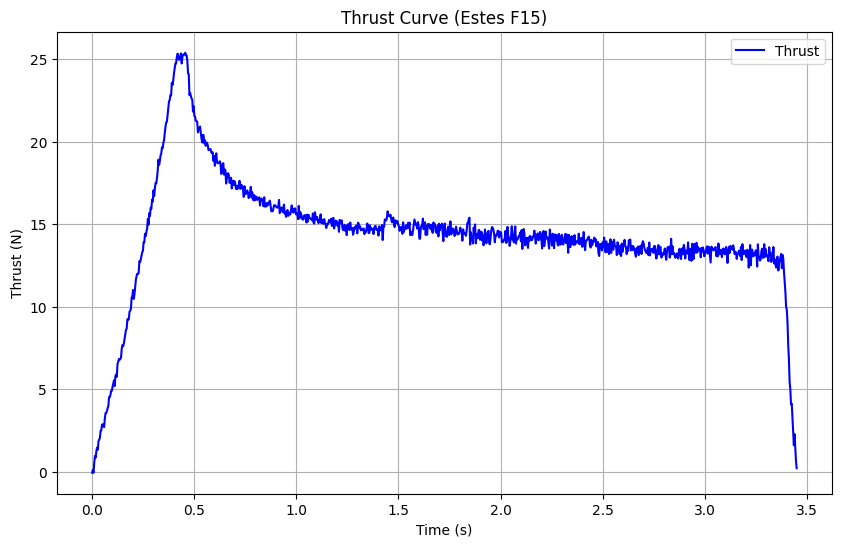

In [22]:
# plot thrust curve
plt.figure(figsize=(10, 6))
plt.plot(time_interpolated, thrust_noisy, label='Thrust', color='blue')
# plt.scatter(time, thrust, color='red')
plt.title('Thrust Curve (Estes F15)')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.legend()
plt.grid()
plt.show()